# Preparation

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.patches as mpatches

plt.rcParams['font.sans-serif'] = ['Arial']
plt.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings('ignore')


In [2]:
plt.style.use("fivethirtyeight")

In [3]:
df_offer = pd.read_csv("datasets/data_offers.csv")
df_order = pd.read_csv("datasets/data_orders.csv")
df_order.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [4]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10716 entries, 0 to 10715
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_datetime                 10716 non-null  object 
 1   origin_longitude               10716 non-null  float64
 2   origin_latitude                10716 non-null  float64
 3   m_order_eta                    2814 non-null   float64
 4   order_gk                       10716 non-null  int64  
 5   order_status_key               10716 non-null  int64  
 6   is_driver_assigned_key         10716 non-null  int64  
 7   cancellations_time_in_seconds  7307 non-null   float64
dtypes: float64(4), int64(3), object(1)
memory usage: 669.9+ KB


In [5]:
df_offer["order_gk"].nunique()

97967

# Q1

In [6]:
g1 = df_order.groupby(["order_status_key","is_driver_assigned_key"]).count()
g1


order_datetime  origin_longitude  \
order_status_key is_driver_assigned_key                                     
4                0                                 4496              4496   
                 1                                 2811              2811   
9                0                                 3406              3406   
                 1                                    3                 3   

                                         origin_latitude  m_order_eta  \
order_status_key is_driver_assigned_key                                 
4                0                                  4496            0   
                 1                                  2811         2811   
9                0                                  3406            0   
                 1                                     3            3   

                                         order_gk  \
order_status_key is_driver_assigned_key             
4                0                           4496   
                 1                           2811   
9                0                           3406   
                 1                              3   

                                         cancellations_time_in_seconds  
order_status_key is_driver_assigned_key                                 
4                0                                                4496  
                 1                                                2811  
9                0                                                   0  
                 1                                                   0

In [7]:
g1.reset_index(inplace=True)
g1

,order_status_key,is_driver_assigned_key,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,cancellations_time_in_seconds
0,4,0,4496,4496,4496,0,4496,4496
1,4,1,2811,2811,2811,2811,2811,2811
2,9,0,3406,3406,3406,0,3406,0
3,9,1,3,3,3,3,3,0


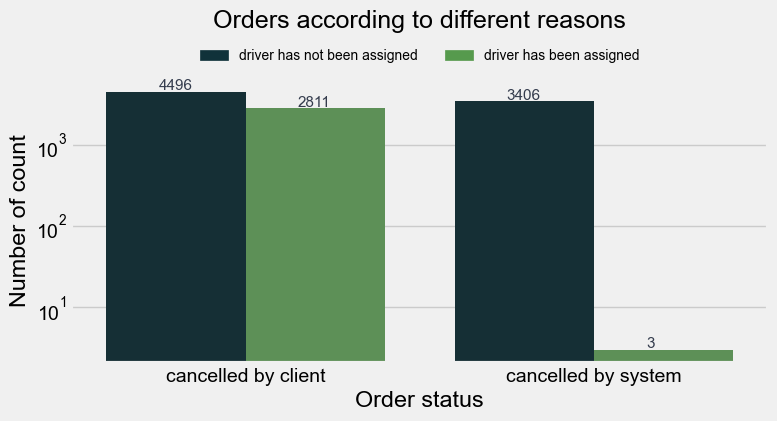

In [8]:
plt.figure(figsize=(8,4.5))
plt.subplots_adjust(top = 0.8)
plt.title("Orders according to different reasons",color = "black",y = 1.15,fontsize = 18)

color_list = ["#10323a","#569a4d"]
custom_palette = sns.color_palette(color_list)

sns.set_palette(custom_palette)
bar = sns.barplot(x = "order_status_key" , y = "order_datetime",  hue = "is_driver_assigned_key" , data = g1)
plt.yscale("log")
plt.xticks([0,1], ["cancelled by client","cancelled by system"]) 
plt.xlabel("Order status")
plt.ylabel("Number of count")

legend_patches = [mpatches.Patch(color=color_list[0], label="driver has not been assigned"),mpatches.Patch(color=color_list[1], label="driver has been assigned")  ]
plt.legend(handles=legend_patches,bbox_to_anchor=(0.5, 1.15), loc='upper center',ncol = 2,fontsize = 10, frameon = False)

for p in bar.patches:
    x = p.get_x() + p.get_width() - 0.25
    y = p.get_y() + p.get_height()/ 0.85

    bar.text(
        x, y, "{:.0f}".format(p.get_height()), va="center", color="#343c4d", fontsize=11
    )
plt.tight_layout()
plt.savefig("output/Q1_bar.svg")

In this bar chart, there are two categories of order status (the order cancelled by the client or the system), which are set in x-axis. In each category, separated into two groups (whether has assigned a driver or not), the number of orders is counted and displayed on the top of each bar.

According to the image, the number of orders cancelled by the client is larger than the number of orders cancelled by the system, with the order that no driver assigned account for more in both categories. Besides, the most orders are cancelled by the client without assigning a driver, which is 4496.

However, there are 3 orders cancelled by system even though the driver has been assigned, which is the least among all the categories. And I get details and display below, from which we can find that these three's `cancellations_time_in_seconds` are Nan while `m_order_eta` are not Nan. Perhaps the driver get to the pick-up point but the client was gone, so the system cancelled the order.

In [9]:
display("Orders cancelled by system with driver assigned:",df_order.loc[(df_order["order_status_key"]==9) & (df_order["is_driver_assigned_key"]==1),:],"All orders cancelled by system:" ,df_order.loc[(df_order["order_status_key"]==9)])


'Orders cancelled by system with driver assigned:'

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
1158,16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN
6881,00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN
7968,00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN


'All orders cancelled by system:'

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN
5,21:21:23,-0.947011,51.456380,NaN,3000583117054,9,0,NaN
6,07:58:15,-0.955637,51.470372,NaN,3000582791789,9,0,NaN
7,07:53:46,-0.978230,51.454575,NaN,3000582791562,9,0,NaN
8,08:53:01,-1.052298,51.454308,NaN,3000582817606,9,0,NaN
...,...,...,...,...,...,...,...,...
10673,14:55:53,-0.924138,51.436341,NaN,3000554896655,9,0,NaN
10682,08:04:58,-0.976793,51.462002,NaN,3000554721763,9,0,NaN
10684,08:08:36,-0.972801,51.478548,NaN,3000554721897,9,0,NaN
10685,23:33:46,-0.964696,51.445968,NaN,3000555121226,9,0,NaN


# Q2

In [10]:
df_order["order_datetime"] = pd.to_datetime(df_order["order_datetime"])
df_order["order_hour"] = df_order["order_datetime"].dt.hour
df_order["order_hour"].head()

0    18
1    20
2    12
3    13
4    21
Name: order_hour, dtype: int32

In [11]:
df_order["order_hour"].value_counts()

order_hour
8     1082
21     846
23     836
22     716
0      683
2      555
17     541
3      513
1      471
20     469
7      447
15     439
18     414
9      412
13     366
16     356
19     317
14     256
12     256
11     193
10     170
6      159
4      152
5       67
Name: count, dtype: int64

In [12]:
def get_category(x):
    if (x["order_status_key"]==9) & (x["is_driver_assigned_key"]==1):
        return "cancelled by system with driver assigned"
    if (x["order_status_key"]==9) & (x["is_driver_assigned_key"]==0):
        return "cancelled by system without driver assigned"
    if (x["order_status_key"]==4) & (x["is_driver_assigned_key"]==1):
        return "cancelled by client with driver assigned"
    if (x["order_status_key"]==4) & (x["is_driver_assigned_key"]==0):
        return "cancelled by client without driver assigned"

df_order["category"] = df_order.apply(get_category,axis = 1)
df_order[['order_status_key', 'is_driver_assigned_key', 'category']].head()

,order_status_key,is_driver_assigned_key,category
0,4,1,cancelled by client with driver assigned
1,4,0,cancelled by client without driver assigned
2,4,1,cancelled by client with driver assigned
3,4,1,cancelled by client with driver assigned
4,9,0,cancelled by system without driver assigned


In [13]:
df_order.loc[~(df_order["category"]=="cancelled by system with driver assigned"),"category"].value_counts()

category
cancelled by client without driver assigned    4496
cancelled by system without driver assigned    3406
cancelled by client with driver assigned       2811
Name: count, dtype: int64

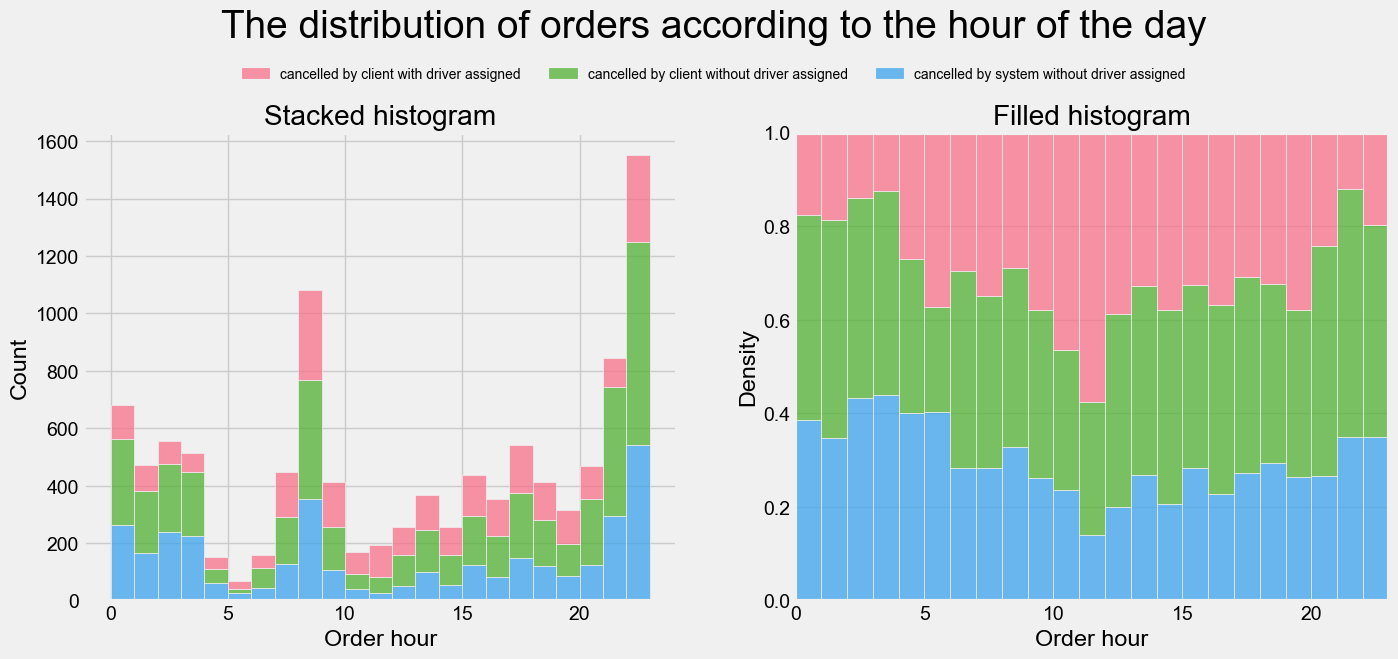

In [14]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6.5))
plt.suptitle("The distribution of orders according to the hour of the day", fontsize=28)
plt.subplots_adjust(top = 0.79)

histplot1 = sns.histplot(data=df_order.loc[df_order["category"] != "cancelled by system with driver assigned"], x="order_hour", hue="category", fill=True, multiple="stack", binwidth=1, ax=axs[0])
axs[0].set_title("Stacked histogram")
axs[0].set_xlabel("Order hour")
histplot2 = sns.histplot(data=df_order.loc[df_order["category"] != "cancelled by system with driver assigned"], x="order_hour", hue="category", fill=True, multiple="fill", binwidth=1, ax=axs[1])
axs[1].set_xlabel("Order hour")
axs[1].set_title("Filled histogram")

axs[1].set_ylabel("Density")


legend2 = histplot2.get_legend()

labels2 = [t.get_text() for t in legend2.get_texts()]
colors2 = [h.get_facecolor() for h in legend2.get_patches()]
tuple_tmp = [(color, label) for label, color in zip(labels2, colors2)]

legend_patches = [mpatches.Patch(color = i[0],label = i[1]) for i in tuple_tmp]

plt.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 0.91), fontsize=10, bbox_transform=fig.transFigure, ncol = 3,frameon = False)

axs[0].get_legend().remove();
# plt.tight_layout()
plt.savefig("output/Q2_histogram_order_hour.svg",bbox_inches="tight")

In [15]:
df_grouped = df_order.loc[df_order["category"]!="cancelled by system with driver assigned",:].groupby(['order_hour', 'category']).size().reset_index(name='count')
df_total = df_grouped.groupby('order_hour')['count'].sum().reset_index(name='total')
df_merged = pd.merge(df_grouped, df_total, on='order_hour')
df_merged['proportion'] = df_merged['count'] / df_merged['total']
df_merged

,order_hour,category,count,total,proportion
0,0,cancelled by client with driver assigned,120,681,0.176211
1,0,cancelled by client without driver assigned,298,681,0.437592
2,0,cancelled by system without driver assigned,263,681,0.386197
3,1,cancelled by client with driver assigned,88,471,0.186837
4,1,cancelled by client without driver assigned,219,471,0.464968
...,...,...,...,...,...
67,22,cancelled by client without driver assigned,326,716,0.455307
68,22,cancelled by system without driver assigned,241,716,0.336592
69,23,cancelled by client with driver assigned,156,836,0.186603
70,23,cancelled by client without driver assigned,378,836,0.452153


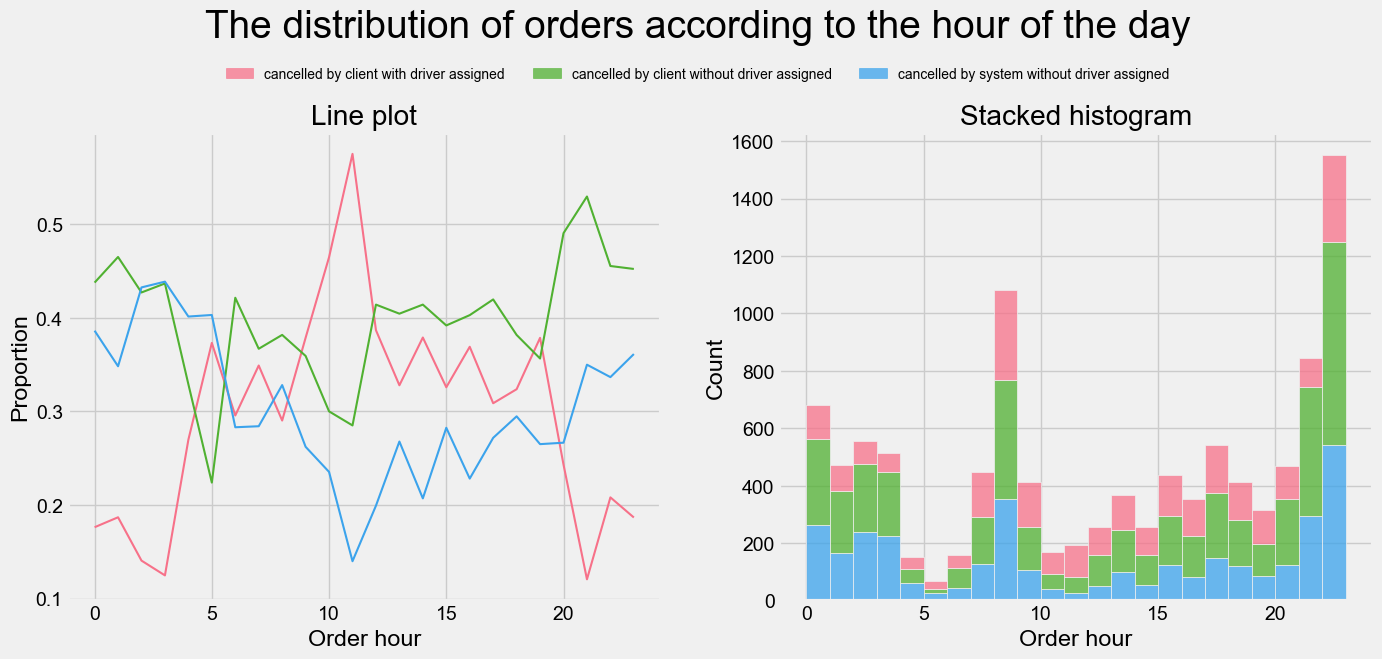

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 6.5))
plt.suptitle("The distribution of orders according to the hour of the day", fontsize=28)
plt.subplots_adjust(top = 0.79)

sns.lineplot(data=df_merged,x = "order_hour",y = "proportion",hue = "category",ax = axs[0],linewidth = 1.5)
axs[0].set_title("Line plot")
axs[0].set_xlabel("Order hour")
axs[0].set_ylabel("Proportion")
histplot2 = sns.histplot(data=df_order.loc[df_order["category"] != "cancelled by system with driver assigned"], x="order_hour", hue="category", fill=True, multiple="stack", binwidth=1, ax=axs[1])
axs[1].set_title("Stacked histogram")
axs[1].set_xlabel("Order hour")

legend2 = histplot2.get_legend()

labels2 = [t.get_text() for t in legend2.get_texts()]
colors2 = [h.get_facecolor() for h in legend2.get_patches()]
tuple_tmp = [(color, label) for label, color in zip(labels2, colors2)]

legend_patches = [mpatches.Patch(color = i[0],label = i[1]) for i in tuple_tmp]

plt.legend(handles=legend_patches, loc="upper center", bbox_to_anchor=(0.5, 0.91), fontsize=10, bbox_transform=fig.transFigure, ncol = 3,frameon = False)

axs[0].get_legend().remove();
# plt.tight_layout()
plt.savefig("output/Q2_histogram&lineplot_order_hour.svg",bbox_inches="tight")

# Q3

## Check missing values

In [17]:
print("The number of records with 'cancellations_time_in_seconds' is Nan:",df_order["cancellations_time_in_seconds"].isnull().sum())
print("The number of records cancelled by system:",len(df_order[df_order["order_status_key"] == 9]))
print("The number of records satisfying both conditions:", len(df_order[(df_order["cancellations_time_in_seconds"].isnull()) & (df_order["order_status_key"] == 9)]))

The number of records with 'cancellations_time_in_seconds' is Nan: 3409
The number of records cancelled by system: 3409
The number of records satisfying both conditions: 3409


In [18]:
print("")
df_order.isnull().sum().to_frame(name = "Number of missing values")

,Number of missing values
order_datetime,0
origin_longitude,0
origin_latitude,0
m_order_eta,7902
order_gk,0
order_status_key,0
is_driver_assigned_key,0
cancellations_time_in_seconds,3409
order_hour,0
category,0


All missing values of `cancellations_time_in_seconds` are caused by the reason that the order was cancelled by system.

When using the `groupby` and `agg` functions, if there are missing values in the data, the pandas library automatically ignores those missing values and calculates the average of the non-missing values.

## Before deleting outliers

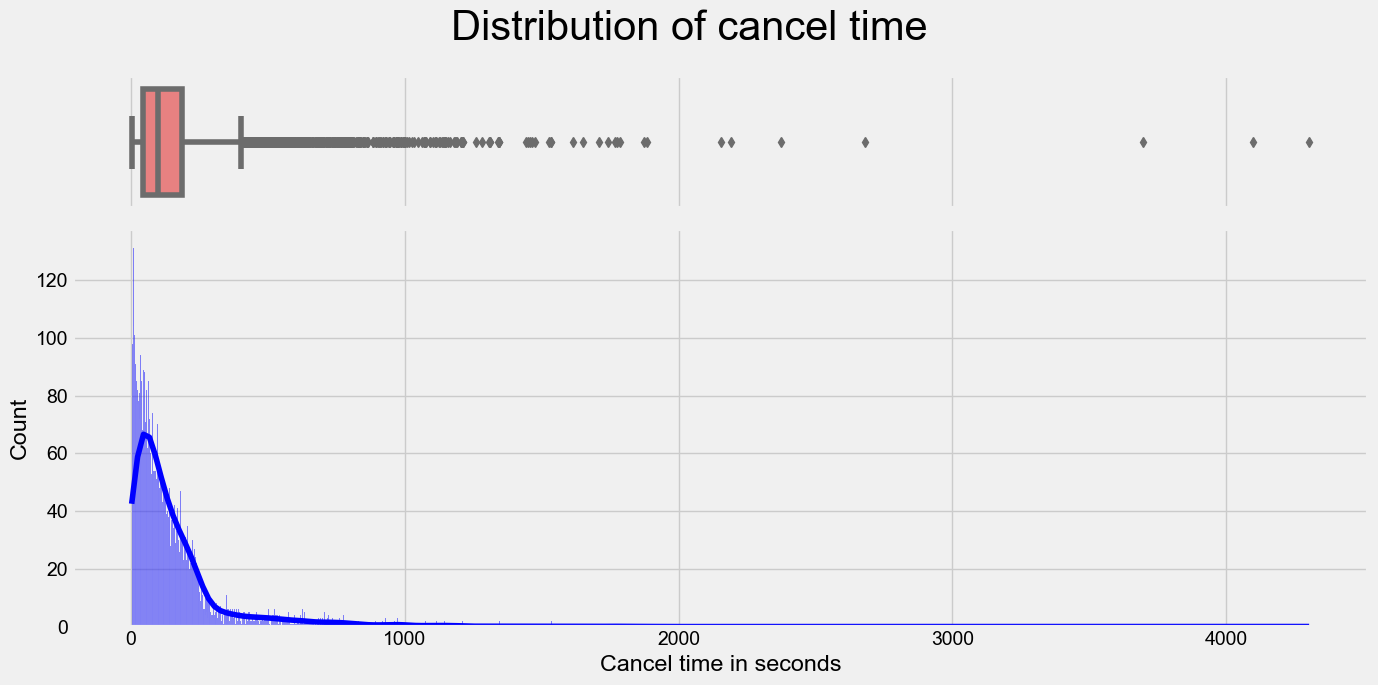

In [19]:
import matplotlib.gridspec as gridspec
fig = plt.figure(figsize=(14, 7))  # 创建一个新的图形，大小为 10x12
gs = gridspec.GridSpec(2, 1, height_ratios=[1, 3])  # 创建一个包含两个子图的网格，上方的子图高度为 1，下方的子图高度为 4
# width_ratios, 调整列的比例

# 在上方的子图中绘制箱型图
ax0 = plt.subplot(gs[0])
sns.boxplot(x='cancellations_time_in_seconds', data=df_order, orient='h',color="#f97070",  ax=ax0)
ax0.set_xlabel("")
ax0.set_xticklabels([])
# 在下方的子图中绘制直方图
ax1 = plt.subplot(gs[1])
sns.histplot(x='cancellations_time_in_seconds', data=df_order, binwidth=2, kde=True, color='blue', alpha=0.5, ax=ax1)
ax1.set_xlabel("Cancel time in seconds")
plt.suptitle('Distribution of cancel time', fontsize=30)
plt.tight_layout()
plt.savefig("output/Q3_distribution_of_cancel_time.svg")

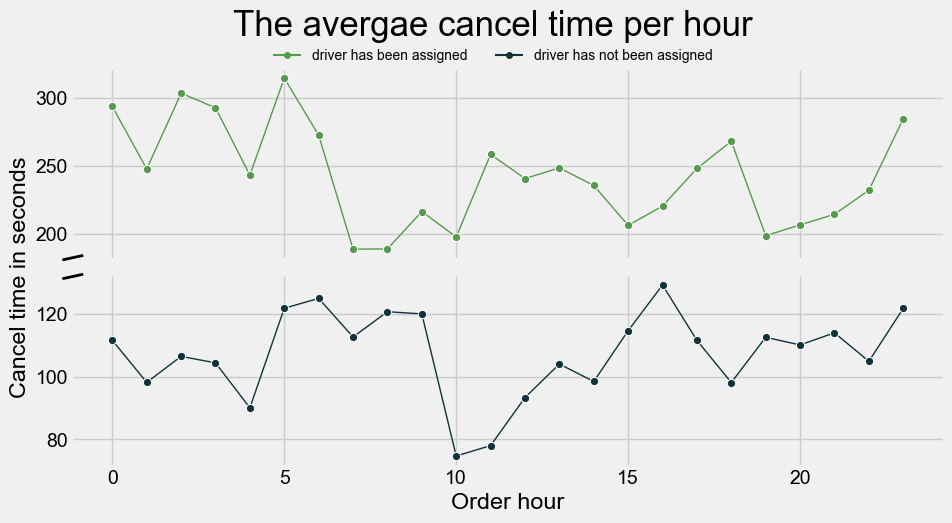

In [20]:
df_avgtime_perhour = df_order.groupby(["order_hour","is_driver_assigned_key"]).agg({"cancellations_time_in_seconds":"mean"}).reset_index()

import matplotlib.lines as mlines

fig,axs = plt.subplots(2,1,figsize=(10, 5),sharex=True)
plt.suptitle("The avergae cancel time per hour",fontsize = 25)
plt.subplots_adjust(hspace =0.1,top = 0.86)

sns.lineplot(data = df_avgtime_perhour[df_avgtime_perhour["is_driver_assigned_key"]==1], x = "order_hour", y = "cancellations_time_in_seconds", marker = "o",linewidth = 1,ax = axs[0],color  = color_list[1])
# axs[0].set_ylim((180, 330))
axs[0].set_ylabel("")
sns.lineplot(data = df_avgtime_perhour[df_avgtime_perhour["is_driver_assigned_key"]==0], x = "order_hour", y = "cancellations_time_in_seconds", marker = "o",linewidth = 1,ax = axs[1])
# axs[1].set_ylim((70, 130))
axs[1].set_ylabel("Cancel time in seconds", y = 1)
plt.xlabel("Order hour")

d = .012  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False,linewidth = 2,linestyle = "-")
axs[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# axs[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# axs[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

green_lines = mlines.Line2D([], [], color=color_list[1], marker='o',markersize=4, label='driver has been assigned',linewidth = 1.5)
black_lines = mlines.Line2D([], [], color=color_list[0], marker='o',markersize=4, label='driver has not been assigned',linewidth = 1.5)
legend_patches = [green_lines, black_lines]
plt.legend(handles= legend_patches,bbox_to_anchor=(0.5, 0.927), loc='upper center',ncol = 2,fontsize = 10, frameon = False,bbox_transform=fig.transFigure)
# plt.tight_layout()
plt.savefig("output/Q3_lineplot.svg",bbox_inches="tight")

## After deleting outliers

It is clear that many outliers. So I will filter them by using the `1.5 IQR` criteria. As the mean is not the same in two groups, I will make it separately.

In [21]:
def filter_IQR(df):
    q1 = np.percentile(df.dropna(),25)
    q3 = np.percentile(df.dropna(), 75)
    iqr = q3 - q1
    whisk = q3 + 1.5*iqr

    return whisk

df_threshold = df_order.groupby("is_driver_assigned_key").agg({"cancellations_time_in_seconds":filter_IQR}).reset_index()
df_filter = df_order.loc[(
    (df_order["is_driver_assigned_key"]==1)&
    (df_order["cancellations_time_in_seconds"]<=659.0
    ) |
    (df_order["is_driver_assigned_key"]==0)&
    (df_order["cancellations_time_in_seconds"]<=335.5)
    )
                    ,:]

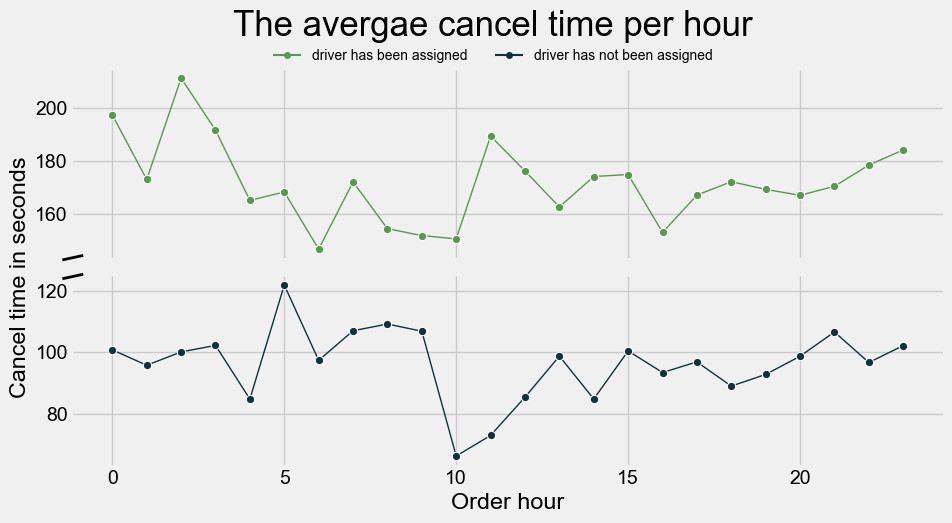

In [22]:
df_avgtime_perhour = df_filter.groupby(["order_hour","is_driver_assigned_key"]).agg({"cancellations_time_in_seconds":"mean"}).reset_index()

import matplotlib.lines as mlines

fig,axs = plt.subplots(2,1,figsize=(10, 5),sharex=True)
plt.suptitle("The avergae cancel time per hour",fontsize = 25)
plt.subplots_adjust(hspace =0.1,top = 0.86)

sns.lineplot(data = df_avgtime_perhour[df_avgtime_perhour["is_driver_assigned_key"]==1], x = "order_hour", y = "cancellations_time_in_seconds", marker = "o",linewidth = 1,ax = axs[0],color  = color_list[1])
# axs[0].set_ylim((180, 330))
axs[0].set_ylabel("")
sns.lineplot(data = df_avgtime_perhour[df_avgtime_perhour["is_driver_assigned_key"]==0], x = "order_hour", y = "cancellations_time_in_seconds", marker = "o",linewidth = 1,ax = axs[1])
# axs[1].set_ylim((70, 130))
axs[1].set_ylabel("Cancel time in seconds", y = 1)
plt.xlabel("Order hour")

d = .012  # how big to make the diagonal lines in axes coordinates
# arguments to pass to plot, just so we don't keep repeating them
kwargs = dict(transform=axs[0].transAxes, color='k', clip_on=False,linewidth = 2,linestyle = "-")
axs[0].plot((-d, +d), (-d, +d), **kwargs)        # top-left diagonal
# axs[0].plot((1 - d, 1 + d), (-d, +d), **kwargs)  # top-right diagonal

kwargs.update(transform=axs[1].transAxes)  # switch to the bottom axes
axs[1].plot((-d, +d), (1 - d, 1 + d), **kwargs)  # bottom-left diagonal
# axs[1].plot((1 - d, 1 + d), (1 - d, 1 + d), **kwargs)  # bottom-right diagonal

axs[1].spines['left'].set_visible(False)
axs[1].spines['bottom'].set_visible(False)
axs[1].spines['right'].set_visible(False)
axs[1].spines['top'].set_visible(False)

axs[0].spines['left'].set_visible(False)
axs[0].spines['bottom'].set_visible(False)
axs[0].spines['right'].set_visible(False)
axs[0].spines['top'].set_visible(False)

green_lines = mlines.Line2D([], [], color=color_list[1], marker='o',markersize=4, label='driver has been assigned',linewidth = 1.5)
black_lines = mlines.Line2D([], [], color=color_list[0], marker='o',markersize=4, label='driver has not been assigned',linewidth = 1.5)
legend_patches = [green_lines, black_lines]
plt.legend(handles= legend_patches,bbox_to_anchor=(0.5, 0.927), loc='upper center',ncol = 2,fontsize = 10, frameon = False,bbox_transform=fig.transFigure)
plt.savefig("output/Q3_lineplot_rmo.svg",bbox_inches="tight")

# Q4

In [23]:
df_meaneta_perhour = df_order.groupby("order_hour").agg({"m_order_eta":"mean"}).reset_index()
df_meaneta_perhour.head(3)

,order_hour,m_order_eta
0,0,357.959016
1,1,324.750000
2,2,391.012821


In [24]:
df_meaneta_perhour.loc[df_meaneta_perhour["order_hour"]==4,"m_order_eta"].values

array([299.65853659])

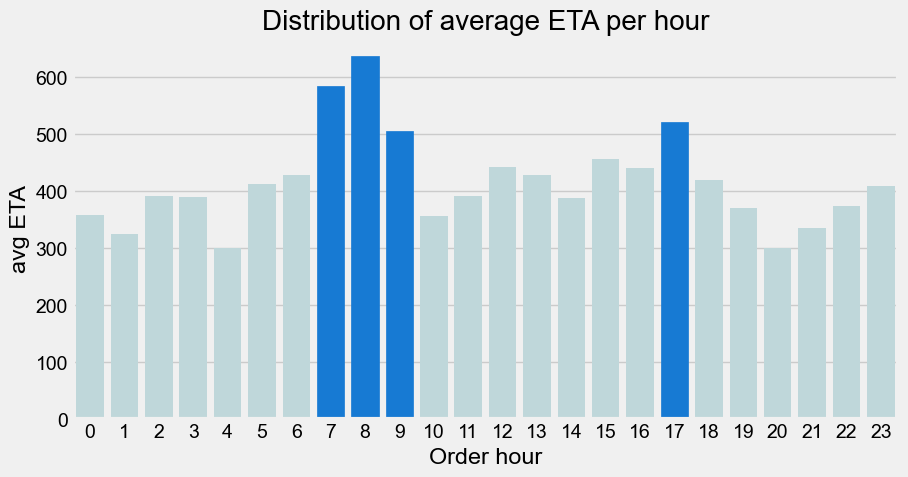

In [25]:
plt.figure(figsize=(9.3,5))
ax= sns.barplot(data = df_meaneta_perhour,x = "order_hour",y = "m_order_eta",color = "#badbde")
plt.xlabel("Order hour")
# sns.barplot(x = 4, y = df_meaneta_perhour.loc[df_meaneta_perhour["order_hour"]==4,"m_order_eta"].values, color = "#f97070")
ax.patches[7].set_color("#177ad3")  # 设置索引为7的柱状条颜色
ax.patches[8].set_color("#177ad3")  # 设置索引为8的柱状条颜色
ax.patches[9].set_color("#177ad3")  # 设置索引为8的柱状条颜色
ax.patches[17].set_color("#177ad3")  # 设置索引为17的柱状条颜色
plt.ylabel("avg ETA")
plt.title("Distribution of average ETA per hour",fontsize = 20)
plt.tight_layout()
plt.savefig("output/Q4_barplot.svg")

# Q5

In [26]:
import h3
import folium

In [27]:
df_map = df_order.copy(deep = True)
df_map.head(3)

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds,order_hour,category
0,2024-04-17 18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0,18,cancelled by client with driver assigned
1,2024-04-17 20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0,20,cancelled by client without driver assigned
2,2024-04-17 12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0,12,cancelled by client with driver assigned


In [32]:
import h3
import folium
from matplotlib import colors
import branca.colormap as cm

df_map['h3_index'] = df_map.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)


df_hex = df_map['h3_index'].value_counts().reset_index()
df_hex.columns = ['h3_index', 'order_count']
df_hex.sort_values(by='order_count', ascending=False, inplace=True)

total_orders = df_hex['order_count'].sum()
df_hex['cumulative_percent'] = df_hex['order_count'].cumsum() / total_orders
df_hex_top8 = df_hex[df_hex['cumulative_percent'] <= 0.8]

# df_hex_top8 = df_hex.head(8)

df_hex_top8['polygon'] = df_hex_top8['h3_index'].apply(lambda x: h3.h3_to_geo_boundary(x, geo_json=False))

m = folium.Map(location=[df_map['origin_latitude'].mean(), df_map['origin_longitude'].mean()], zoom_start=12)

for index, row in df_map.iterrows():
    folium.CircleMarker(
        location=[row['origin_latitude'], row['origin_longitude']],
        radius=0.6,
        color='red',
        fill=True,
        fill_color='red'
    ).add_to(m)

# cmap = colors.LinearSegmentedColormap.from_list('custom', ['green', 'yellow', 'red'], N=256)
# for index, row in df_hex_top8.iterrows():
#     color = colors.to_hex(cmap(row['order_count'] / df_hex_top8['order_count'].max()))
#     folium.Polygon(locations=row['polygon'],color = None, fill_color=color,fill_opacity=0.7).add_to(m)

# Create a color map
cmap = cm.LinearColormap(colors=['green', 'yellow', 'red'], vmin=df_hex_top8['order_count'].min(), vmax=df_hex_top8['order_count'].max(), caption='Order Count')

# Add the color map to the map
cmap.add_to(m)

# Use the color map to color the polygons
for index, row in df_hex_top8.iterrows():
    color = cmap(row['order_count'])
    folium.Polygon(locations=row['polygon'], color=None, fill_color=color, fill_opacity=0.7).add_to(m)
    
m.save('output/Q4_map.html')